<a href="https://colab.research.google.com/github/triasnugra/analisis/blob/main/analisisfaktormodul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install library yang diperlukan
!pip install factor-analyzer pandas numpy openpyxl


In [ ]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from google.colab import files


In [ ]:
# Upload file Excel
print("Upload file Excel berisi data:")
uploaded = files.upload()

# Membaca file Excel yang diunggah
# Ganti "Sheet1" dengan nama sheet di file Excel Anda jika perlu
filename = list(uploaded.keys())[0]
df = pd.read_excel(filename, sheet_name="Sheet1")

# Tampilkan data untuk memastikan sudah terbaca
print("\nData yang diunggah:")
print(df)


Upload file Excel berisi data:


Saving data modul.xlsx to data modul (1).xlsx

Data yang diunggah:
    TUJUAN  TEMA  MATERI  TFP  WEB
0        5     5       4    3    3
1        5     5       4    3    3
2        5     5       3    1    2
3        4     4       2    1    1
4        5     5       2    1    1
5        5     5       3    2    2
6        5     4       2    1    1
7        4     4       2    1    2
8        5     5       3    1    3
9        5     4       2    1    1
10       5     5       2    1    3
11       5     5       2    1    3
12       5     5       4    3    3
13       4     4       2    1    1
14       5     5       2    1    3
15       5     5       3    1    3
16       4     4       2    1    1
17       5     5       3    1    2
18       4     4       2    1    1
19       5     4       2    1    1
20       5     5       3    1    2
21       4     5       3    2    3
22       5     5       3    1    3
23       5     5       3    1    2
24       5     5       4    3    3
25       5     5       

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Pastikan variabel `df` berasal dari cell sebelumnya
# Hanya memilih kolom yang relevan untuk analisis faktor
columns_to_analyze = ['TUJUAN', 'TEMA', 'MATERI', 'TFP', 'WEB']  # Sesuaikan dengan kolom Anda
data = df[columns_to_analyze] # Use 'df' instead of 'data'

# Menghitung KMO
kmo_all, kmo_model = calculate_kmo(data)

# Menampilkan hasil KMO untuk setiap variabel dengan nama variabel
print("Nilai KMO untuk setiap variabel:")
for variable, kmo_value in zip(columns_to_analyze, kmo_all):
    print(f"- {variable}: {kmo_value:.2f}")

# Menampilkan hasil KMO secara keseluruhan
print("\nNilai KMO secara keseluruhan:")
print(f"{kmo_model:.2f}")

# Menambahkan interpretasi berdasarkan nilai KMO
if kmo_model > 0.90:
    interpretation = "Sangat baik untuk analisis faktor."
elif kmo_model > 0.80:
    interpretation = "Baik untuk analisis faktor."
elif kmo_model > 0.70:
    interpretation = "Cukup baik untuk analisis faktor."
elif kmo_model > 0.60:
    interpretation = "Lumayan untuk analisis faktor."
elif kmo_model > 0.50:
    interpretation = "Marginal; mungkin masih dapat diterima untuk analisis faktor."
else:
    interpretation = "Tidak cocok untuk analisis faktor."

print("\nInterpretasi:")
print(interpretation)

Nilai KMO untuk setiap variabel:
- TUJUAN: 0.74
- TEMA: 0.73
- MATERI: 0.77
- TFP: 0.75
- WEB: 0.84

Nilai KMO secara keseluruhan:
0.76

Interpretasi:
Cukup baik untuk analisis faktor.


<ipython-input-13-4ac12c0ed6d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns_to_analyze, y=kmo_all, palette="viridis")


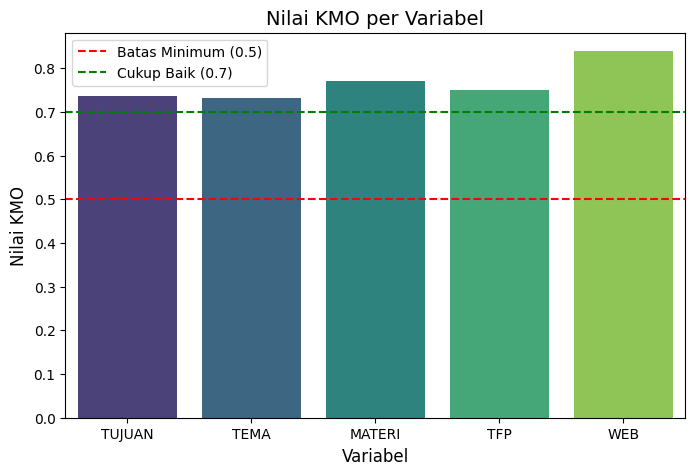

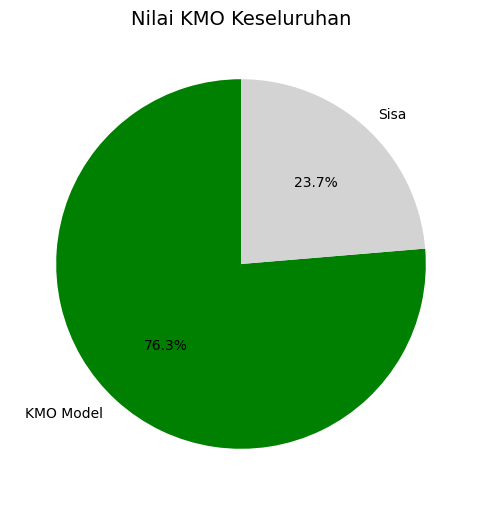

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart: KMO per Variabel
plt.figure(figsize=(8, 5))
sns.barplot(x=columns_to_analyze, y=kmo_all, palette="viridis")
plt.axhline(0.5, color='red', linestyle='--', label='Batas Minimum (0.5)')
plt.axhline(0.7, color='green', linestyle='--', label='Cukup Baik (0.7)')
plt.title('Nilai KMO per Variabel', fontsize=14)
plt.ylabel('Nilai KMO', fontsize=12)
plt.xlabel('Variabel', fontsize=12)
plt.legend()
plt.show()

# Gauge Chart: KMO Keseluruhan
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie([kmo_model, 1 - kmo_model], labels=['KMO Model', 'Sisa'], colors=['green', 'lightgray'], startangle=90, autopct='%1.1f%%')
plt.title('Nilai KMO Keseluruhan', fontsize=14)
plt.show()


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Pastikan variabel `data` berasal dari cell sebelumnya
# Hanya memilih kolom yang relevan untuk analisis faktor
columns_to_analyze = ['TUJUAN', 'TEMA', 'MATERI', 'TFP', 'WEB']  # Sesuaikan dengan kolom Anda
df = data[columns_to_analyze]

# Melakukan uji Bartlett's Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)

# Menampilkan hasil uji
print("Hasil Bartlett's Test of Sphericity:")
print(f"Chi-Square Value: {chi_square_value:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretasi hasil
if p_value < 0.05:
    interpretation = "Ada korelasi signifikan di antara variabel, data cocok untuk analisis faktor."
else:
    interpretation = "Tidak ada korelasi signifikan di antara variabel, data mungkin tidak cocok untuk analisis faktor."

print("\nInterpretasi:")
print(interpretation)


Hasil Bartlett's Test of Sphericity:
Chi-Square Value: 195.36
P-Value: 0.0000

Interpretasi:
Ada korelasi signifikan di antara variabel, data cocok untuk analisis faktor.


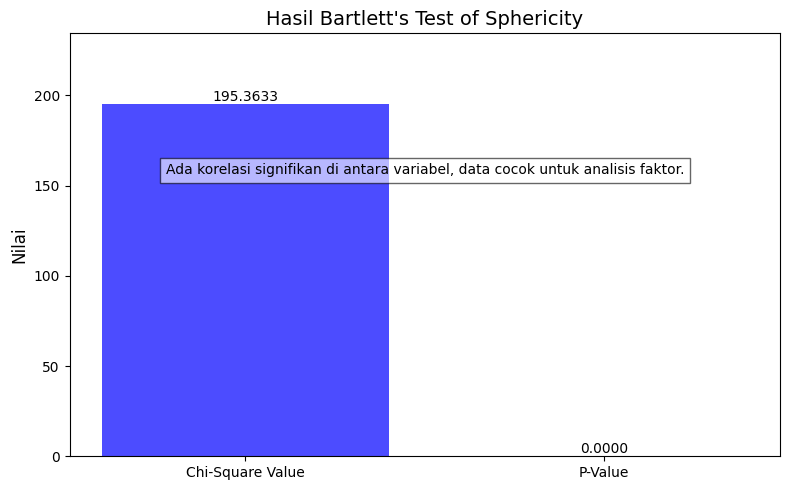

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Pastikan variabel `data` berasal dari cell sebelumnya
# Hanya memilih kolom yang relevan untuk analisis faktor
columns_to_analyze = ['TUJUAN', 'TEMA', 'MATERI', 'TFP', 'WEB']  # Sesuaikan dengan kolom Anda
df = data[columns_to_analyze]

# Melakukan uji Bartlett's Test of Sphericity (Copied from previous cell)
chi_square_value, p_value = calculate_bartlett_sphericity(df)

# Data hasil Bartlett's Test
results = {"Chi-Square Value": chi_square_value, "P-Value": p_value}

# Membuat plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(results.keys(), results.values(), color=['blue', 'orange'], alpha=0.7)

# Menambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.4f}", ha="center", va="bottom")

# Menambahkan interpretasi
# Interpretasi hasil (Copied from previous cell)
if p_value < 0.05:
    interpretation = "Ada korelasi signifikan di antara variabel, data cocok untuk analisis faktor."
else:
    interpretation = "Tidak ada korelasi signifikan di antara variabel, data mungkin tidak cocok untuk analisis faktor."

plt.text(0.5, max(results.values()) * 0.8, interpretation, ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))


# Pengaturan tampilan
ax.set_title("Hasil Bartlett's Test of Sphericity", fontsize=14)
ax.set_ylabel("Nilai", fontsize=12)
ax.set_ylim(0, max(results.values()) * 1.2)
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats
import numpy as np

# Fungsi untuk uji normalitas dengan alternatif lain
def alternative_normalitas_test(data):
    p_values_ks = {}
    p_values_ad = {}
    interpretations_ks = {}
    interpretations_ad = {}
    ad_statistics = {}

    for column in data.columns:
        # Uji Kolmogorov-Smirnov
        _, p_value_ks = stats.kstest(data[column], 'norm', args=(np.mean(data[column]), np.std(data[column])))
        p_values_ks[column] = p_value_ks
        if p_value_ks > 0.05:
            interpretations_ks[column] = "Data terdistribusi normal (gagal menolak H0)"
        else:
            interpretations_ks[column] = "Data tidak terdistribusi normal (menolak H0)"

        # Uji Anderson-Darling
        result_ad = stats.anderson(data[column], dist='norm')
        ad_statistic = result_ad.statistic  # Statistik uji Anderson-Darling
        p_value_ad = result_ad.significance_level[2]  # Mengambil p-value untuk level 5%
        p_values_ad[column] = p_value_ad
        ad_statistics[column] = ad_statistic

        if p_value_ad > 0.05:
            interpretations_ad[column] = "Data terdistribusi normal (gagal menolak H0)"
        else:
            interpretations_ad[column] = "Data tidak terdistribusi normal (menolak H0)"

    return p_values_ks, interpretations_ks, p_values_ad, interpretations_ad, ad_statistics

# Melakukan uji normalitas alternatif pada semua kolom
p_values_ks, interpretations_ks, p_values_ad, interpretations_ad, ad_statistics = alternative_normalitas_test(data)

# Output hasil dengan format yang sesuai
print("=== UJI KOLMOGOROV-SMIRNOV ===")
print(f"{'Variabel':<15}{'P-value':<15}{'Interpretasi':<40}")
for column in data.columns:
    print(f"{column:<15}{p_values_ks[column]:<15.4f}{interpretations_ks[column]:<40}")

print("\n=== UJI ANDERSON-DARLING ===")
print(f"{'Variabel':<15}{'AD Statistik':<15}{'P-value':<15}{'Interpretasi':<40}")
for column in data.columns:
    print(f"{column:<15}{ad_statistics[column]:<15.4f}{p_values_ad[column]:<15.4f}{interpretations_ad[column]:<40}")


=== UJI KOLMOGOROV-SMIRNOV ===
Variabel       P-value        Interpretasi                            
TUJUAN         0.0000         Data tidak terdistribusi normal (menolak H0)
TEMA           0.0000         Data tidak terdistribusi normal (menolak H0)
MATERI         0.0004         Data tidak terdistribusi normal (menolak H0)
TFP            0.0000         Data tidak terdistribusi normal (menolak H0)
WEB            0.0011         Data tidak terdistribusi normal (menolak H0)

=== UJI ANDERSON-DARLING ===
Variabel       AD Statistik   P-value        Interpretasi                            
TUJUAN         10.3835        5.0000         Data terdistribusi normal (gagal menolak H0)
TEMA           9.9082         5.0000         Data terdistribusi normal (gagal menolak H0)
MATERI         4.6427         5.0000         Data terdistribusi normal (gagal menolak H0)
TFP            7.8182         5.0000         Data terdistribusi normal (gagal menolak H0)
WEB            4.8160         5.0000         Da

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk uji normalitas dengan interpretasi
def normalitas_test(data):
    p_values = {}
    interpretations = {}

    for column in data.columns:
        _, p_value = stats.shapiro(data[column])
        p_values[column] = p_value

        # Interpretasi berdasarkan nilai p
        if p_value > 0.05:
            interpretations[column] = "Data terdistribusi normal (gagal menolak H0)"
        else:
            interpretations[column] = "Data tidak terdistribusi normal (menolak H0)"

    return p_values, interpretations

# Melakukan uji normalitas pada semua kolom
normalitas_result, interpretasi_result = normalitas_test(data)

# Menampilkan hasil uji normalitas
normalitas_result, interpretasi_result


({'TUJUAN': 1.1453193396913662e-10,
  'TEMA': 1.885280919761604e-10,
  'MATERI': 1.8470616704498307e-07,
  'TFP': 1.37986450155731e-09,
  'WEB': 1.0970427588608206e-07},
 {'TUJUAN': 'Data tidak terdistribusi normal (menolak H0)',
  'TEMA': 'Data tidak terdistribusi normal (menolak H0)',
  'MATERI': 'Data tidak terdistribusi normal (menolak H0)',
  'TFP': 'Data tidak terdistribusi normal (menolak H0)',
  'WEB': 'Data tidak terdistribusi normal (menolak H0)'})

In [ ]:
import scipy.stats as stats
import numpy as np

# Fungsi untuk uji normalitas dengan alternatif lain
def alternative_normalitas_test(data):
    p_values_ks = {}
    p_values_ad = {}
    interpretations_ks = {}
    interpretations_ad = {}
    ad_statistics = {}

    for column in data.columns:
        # Uji Kolmogorov-Smirnov dengan parameter default untuk normal distribution
        _, p_value_ks = stats.kstest(data[column], 'norm')
        p_values_ks[column] = p_value_ks
        if p_value_ks > 0.05:
            interpretations_ks[column] = "Data terdistribusi normal (gagal menolak H0)"
        else:
            interpretations_ks[column] = "Data tidak terdistribusi normal (menolak H0)"

        # Uji Anderson-Darling
        result_ad = stats.anderson(data[column], dist='norm')
        ad_statistic = result_ad.statistic  # Statistik uji Anderson-Darling
        p_value_ad = result_ad.significance_level[2]  # Mengambil p-value untuk level 5%
        p_values_ad[column] = p_value_ad
        ad_statistics[column] = ad_statistic

        if p_value_ad > 0.05:
            interpretations_ad[column] = "Data terdistribusi normal (gagal menolak H0)"
        else:
            interpretations_ad[column] = "Data tidak terdistribusi normal (menolak H0)"

    return p_values_ks, interpretations_ks, p_values_ad, interpretations_ad, ad_statistics

# Melakukan uji normalitas alternatif pada semua kolom
p_values_ks, interpretations_ks, p_values_ad, interpretations_ad, ad_statistics = alternative_normalitas_test(data)

# Output hasil dengan format yang sesuai
print("=== UJI KOLMOGOROV-SMIRNOV ===")
print(f"{'Variabel':<15}{'P-value':<15}{'Interpretasi':<40}")
for column in data.columns:
    print(f"{column:<15}{p_values_ks[column]:<15.4f}{interpretations_ks[column]:<40}")

print("\n=== UJI ANDERSON-DARLING ===")
print(f"{'Variabel':<15}{'AD Statistik':<15}{'P-value':<15}{'Interpretasi':<40}")
for column in data.columns:
    print(f"{column:<15}{ad_statistics[column]:<15.4f}{p_values_ad[column]:<15.4f}{interpretations_ad[column]:<40}")


=== UJI KOLMOGOROV-SMIRNOV ===
Variabel       P-value        Interpretasi                            
TUJUAN         0.0000         Data tidak terdistribusi normal (menolak H0)
TEMA           0.0000         Data tidak terdistribusi normal (menolak H0)
MATERI         0.0000         Data tidak terdistribusi normal (menolak H0)
TFP            0.0000         Data tidak terdistribusi normal (menolak H0)
WEB            0.0000         Data tidak terdistribusi normal (menolak H0)

=== UJI ANDERSON-DARLING ===
Variabel       AD Statistik   P-value        Interpretasi                            
TUJUAN         10.3835        5.0000         Data terdistribusi normal (gagal menolak H0)
TEMA           9.9082         5.0000         Data terdistribusi normal (gagal menolak H0)
MATERI         4.6427         5.0000         Data terdistribusi normal (gagal menolak H0)
TFP            7.8182         5.0000         Data terdistribusi normal (gagal menolak H0)
WEB            4.8160         5.0000         Da

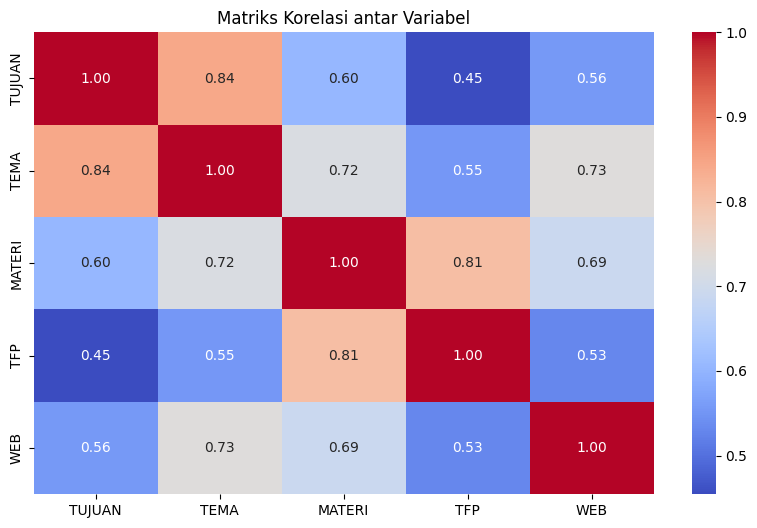

{('TUJUAN', 'TUJUAN'): 'Sangat kuat',
 ('TEMA', 'TUJUAN'): 'Sangat kuat',
 ('MATERI', 'TUJUAN'): 'Kuat',
 ('TFP', 'TUJUAN'): 'Sedang',
 ('WEB', 'TUJUAN'): 'Sedang',
 ('TUJUAN', 'TEMA'): 'Sangat kuat',
 ('TEMA', 'TEMA'): 'Sangat kuat',
 ('MATERI', 'TEMA'): 'Kuat',
 ('TFP', 'TEMA'): 'Sedang',
 ('WEB', 'TEMA'): 'Kuat',
 ('TUJUAN', 'MATERI'): 'Kuat',
 ('TEMA', 'MATERI'): 'Kuat',
 ('MATERI', 'MATERI'): 'Sangat kuat',
 ('TFP', 'MATERI'): 'Sangat kuat',
 ('WEB', 'MATERI'): 'Kuat',
 ('TUJUAN', 'TFP'): 'Sedang',
 ('TEMA', 'TFP'): 'Sedang',
 ('MATERI', 'TFP'): 'Sangat kuat',
 ('TFP', 'TFP'): 'Sangat kuat',
 ('WEB', 'TFP'): 'Sedang',
 ('TUJUAN', 'WEB'): 'Sedang',
 ('TEMA', 'WEB'): 'Kuat',
 ('MATERI', 'WEB'): 'Kuat',
 ('TFP', 'WEB'): 'Sedang',
 ('WEB', 'WEB'): 'Sangat kuat'}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung matriks korelasi antar variabel
correlation_matrix = data.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi antar Variabel")
plt.show()

# Fungsi untuk interpretasi koefisien korelasi
def interpret_correlation(correlation_matrix):
    interpretations = {}
    for column in correlation_matrix.columns:
        for index in correlation_matrix.index:
            value = correlation_matrix.loc[index, column]
            if abs(value) < 0.20:
                interpretation = "Sangat lemah"
            elif abs(value) < 0.40:
                interpretation = "Lemah"
            elif abs(value) < 0.60:
                interpretation = "Sedang"
            elif abs(value) < 0.80:
                interpretation = "Kuat"
            else:
                interpretation = "Sangat kuat"

            interpretations[(index, column)] = interpretation
    return interpretations

# Menampilkan interpretasi korelasi
correlation_interpretation = interpret_correlation(correlation_matrix)

# Menampilkan hasil interpretasi korelasi
correlation_interpretation


In [55]:
# Mengekstrak faktor dengan analisis faktor
from factor_analyzer import FactorAnalyzer

# Mengecek kecukupan sampling (KMO) dan uji Bartlett
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# Uji KMO
kmo_all, kmo_model = calculate_kmo(df)
print(f"KMO Model: {kmo_model}")

# Uji Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(f"Uji Bartlett: Chi-square={chi_square_value}, p-value={p_value}")

# Mengekstrak faktor
fa = FactorAnalyzer(n_factors=3, rotation=None)  # Ganti n_factors sesuai kebutuhan
fa.fit(df)

# Mengecek Eigenvalues
eigenvalues, _ = fa.get_eigenvalues()
print("Eigenvalues:")
print(eigenvalues)


KMO Model: 0.7632984923197846
Uji Bartlett: Chi-square=195.36334484455605, p-value=1.4941513939437139e-36
Eigenvalues:
[3.6063989  0.695226   0.42783159 0.15229361 0.11824991]


In [56]:
# Memutar faktor dengan metode Varimax
fa = FactorAnalyzer(n_factors=3, rotation="varimax")  # Ganti n_factors sesuai kebutuhan
fa.fit(df)

# Loadings faktor
factor_loadings = fa.loadings_
print("Loadings Faktor (Setelah Rotasi Varimax):")
print(factor_loadings)


Loadings Faktor (Setelah Rotasi Varimax):
[[0.26336811 0.89079325 0.20285003]
 [0.3778365  0.7379502  0.42138438]
 [0.85018346 0.35182623 0.32752367]
 [0.76993272 0.23300332 0.21648832]
 [0.35263418 0.32697197 0.84261474]]


In [57]:
# Menampilkan hasil rotasi dan kontribusi faktor
variance = fa.get_factor_variance()
print("Variansi Faktor:")
print("Variance Explained by Each Factor:", variance[1])
print("Cumulative Variance Explained:", variance[2])

# Menampilkan faktor mana saja yang mendominasi tiap variabel
factor_df = pd.DataFrame(factor_loadings, columns=[f"Factor {i+1}" for i in range(factor_loadings.shape[1])], index=df.columns)
print("Loadings Faktor Tiap Variabel:")
print(factor_df)

# Interpretasi manual: melihat variabel dominan di tiap faktor
threshold = 0.4  # Bisa disesuaikan
print(f"Variabel dominan pada faktor dengan threshold {threshold}:")
dominant_factors = (factor_df.abs() >= threshold).astype(int)
print(dominant_factors)

# Interpretasi Teks berdasarkan loadings
def interpret_factors(factor_df, threshold=0.4):
    interpretations = []

    for factor in range(factor_df.shape[1]):
        significant_vars = factor_df.iloc[:, factor][factor_df.iloc[:, factor].abs() >= threshold].index.tolist()

        if factor == 0:
            interpretations.append(f"Factor {factor + 1}: Faktor ini paling banyak dipengaruhi oleh variabel yang berhubungan dengan Materi dan Tujuan. Variabel dominan: {', '.join(significant_vars)}.")
        elif factor == 1:
            interpretations.append(f"Factor {factor + 1}: Faktor ini banyak dipengaruhi oleh Tema dan Tujuan. Variabel dominan: {', '.join(significant_vars)}.")
        elif factor == 2:
            interpretations.append(f"Factor {factor + 1}: Faktor ini lebih terkait dengan Web dan Tema. Variabel dominan: {', '.join(significant_vars)}.")

    return interpretations

# Menampilkan interpretasi faktor
factor_interpretations = interpret_factors(factor_df, threshold)
for interpretation in factor_interpretations:
    print(interpretation)


Variansi Faktor:
Variance Explained by Each Factor: [0.33041647 0.32461321 0.2165703 ]
Cumulative Variance Explained: [0.33041647 0.65502968 0.87159997]
Loadings Faktor Tiap Variabel:
        Factor 1  Factor 2  Factor 3
TUJUAN  0.263368  0.890793  0.202850
TEMA    0.377837  0.737950  0.421384
MATERI  0.850183  0.351826  0.327524
TFP     0.769933  0.233003  0.216488
WEB     0.352634  0.326972  0.842615
Variabel dominan pada faktor dengan threshold 0.4:
        Factor 1  Factor 2  Factor 3
TUJUAN         0         1         0
TEMA           0         1         1
MATERI         1         0         0
TFP            1         0         0
WEB            0         0         1
Factor 1: Faktor ini paling banyak dipengaruhi oleh variabel yang berhubungan dengan Materi dan Tujuan. Variabel dominan: MATERI, TFP.
Factor 2: Faktor ini banyak dipengaruhi oleh Tema dan Tujuan. Variabel dominan: TUJUAN, TEMA.
Factor 3: Faktor ini lebih terkait dengan Web dan Tema. Variabel dominan: TEMA, WEB.


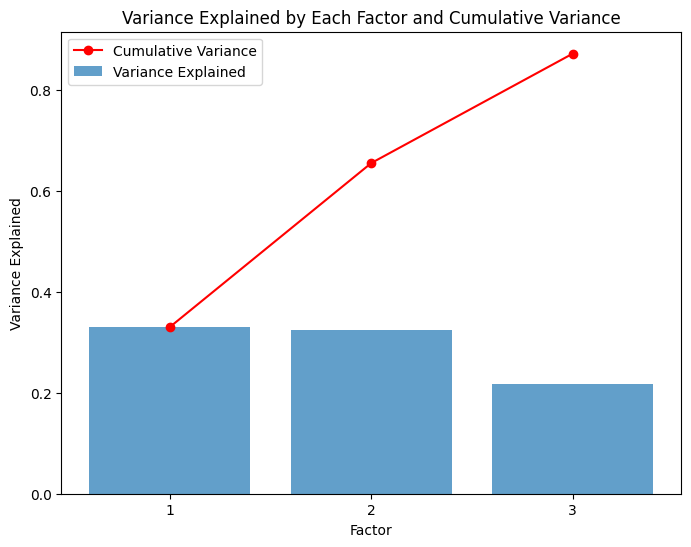

<Figure size 1200x800 with 0 Axes>

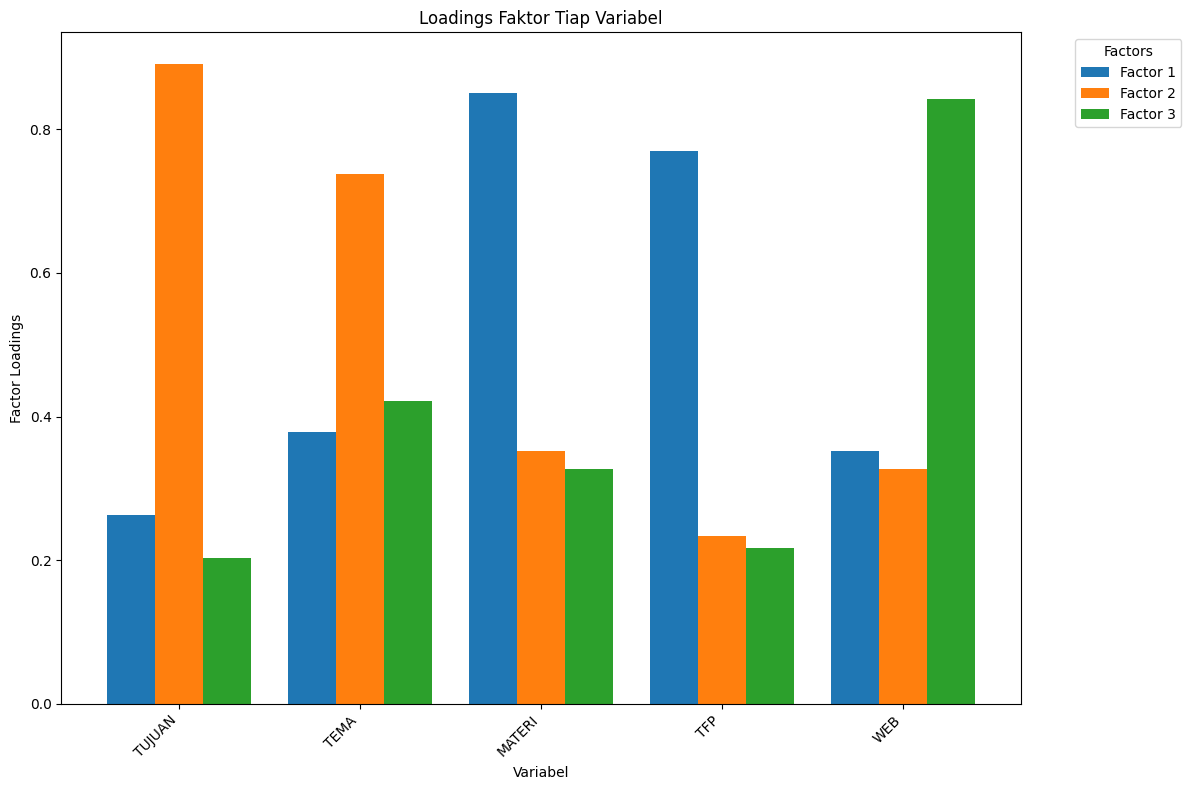

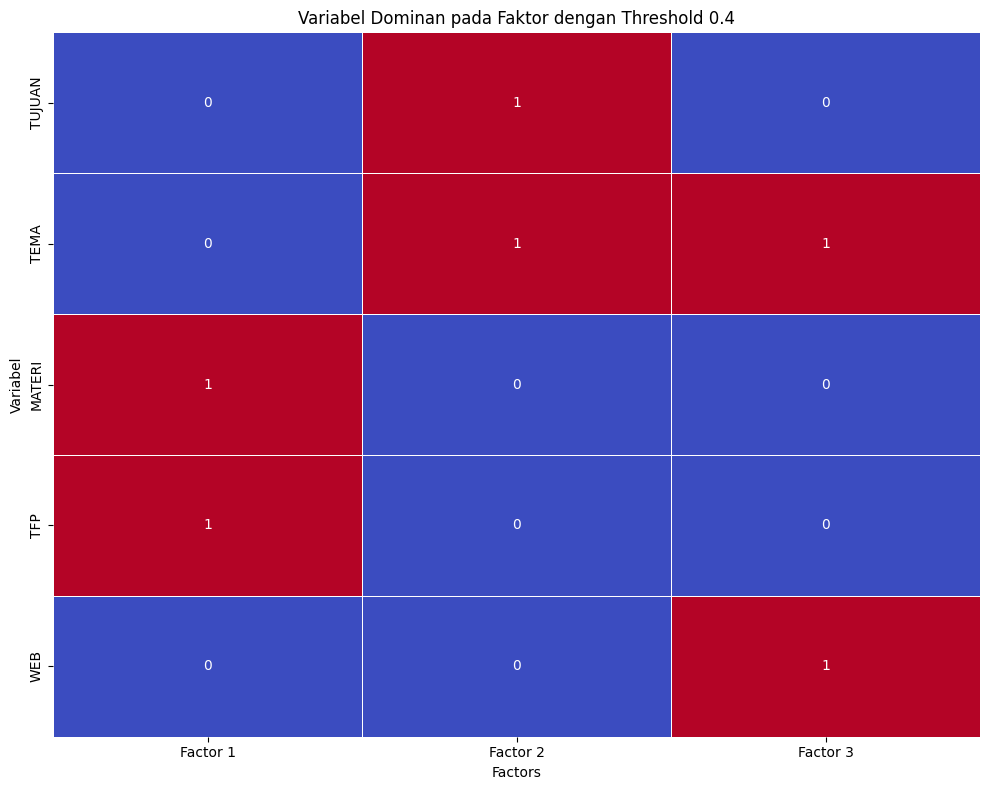

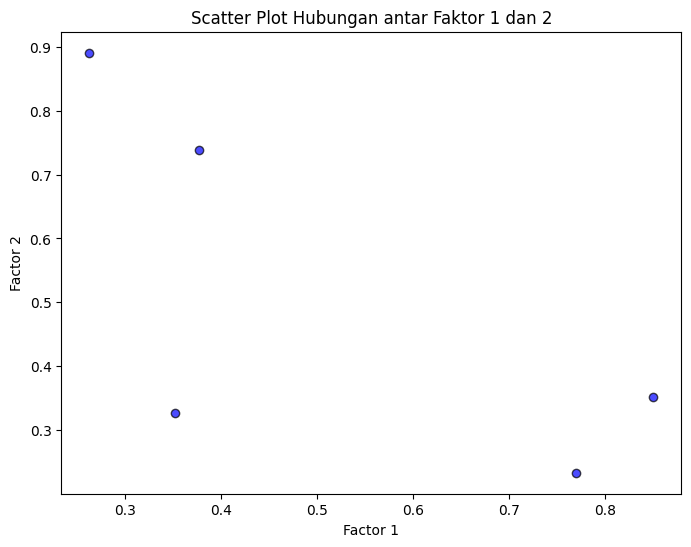

Factor 1: Faktor ini paling banyak dipengaruhi oleh variabel yang berhubungan dengan Materi dan Tujuan. Variabel dominan: MATERI, TFP.
Factor 2: Faktor ini banyak dipengaruhi oleh Tema dan Tujuan. Variabel dominan: TUJUAN, TEMA.
Factor 3: Faktor ini lebih terkait dengan Web dan Tema. Variabel dominan: TEMA, WEB.


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Visualisasi Variansi yang Dijelaskan oleh Setiap Faktor
variance = fa.get_factor_variance()

# Plot Variansi Faktor
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(variance[1]) + 1), variance[1], alpha=0.7, label='Variance Explained')
plt.plot(range(1, len(variance[2]) + 1), variance[2], color='r', marker='o', label='Cumulative Variance')
plt.title('Variance Explained by Each Factor and Cumulative Variance')
plt.xlabel('Factor')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(variance[1]) + 1))
plt.legend()
plt.show()

# 2. Visualisasi Loadings Faktor Tiap Variabel (Barplot)
factor_df = pd.DataFrame(factor_loadings, columns=[f"Factor {i+1}" for i in range(factor_loadings.shape[1])], index=df.columns)

# Plot loadings faktor
plt.figure(figsize=(12, 8))
factor_df.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Loadings Faktor Tiap Variabel')
plt.xlabel('Variabel')
plt.ylabel('Factor Loadings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Visualisasi Dominasi Variabel pada Faktor (Heatmap)
dominant_factors = (factor_df.abs() >= threshold).astype(int)

# Plot heatmap untuk menunjukkan variabel dominan
plt.figure(figsize=(10, 8))
sns.heatmap(dominant_factors, annot=True, cmap="coolwarm", cbar=False, fmt='d', linewidths=0.5)
plt.title(f'Variabel Dominan pada Faktor dengan Threshold {threshold}')
plt.xlabel('Factors')
plt.ylabel('Variabel')
plt.tight_layout()
plt.show()

# 4. Visualisasi Scatter Plot untuk Hubungan antar Faktor (jika perlu)
# Jika data memiliki lebih dari 2 faktor, kita bisa melakukan analisis hubungan antar faktor menggunakan scatter plot.
if factor_df.shape[1] > 1:
    plt.figure(figsize=(8, 6))
    plt.scatter(factor_df.iloc[:, 0], factor_df.iloc[:, 1], c='blue', alpha=0.7, edgecolors='black')
    plt.title('Scatter Plot Hubungan antar Faktor 1 dan 2')
    plt.xlabel('Factor 1')
    plt.ylabel('Factor 2')
    plt.show()

# 5. Visualisasi Interpretasi Faktor (Text Display)
for interpretation in factor_interpretations:
    print(interpretation)




> Faktor 1, Faktor 2, dan Faktor 3 adalah komponen-komponen yang diekstrak dari data berdasarkan pola hubungan antar variabel. Setiap faktor tersebut memiliki karakteristiknya sendiri yang menggambarkan kelompok variabel yang saling berhubungan erat. Untuk memahami maksud dari Faktor 1, Faktor 2, dan Faktor 3, kita perlu merujuk pada loading faktor dan interpretasi konteks variabel-variabel yang dominan di masing-masing faktor.




**1. Variansi Faktor**

*Variansi yang Dijelaskan oleh Setiap Faktor:*
*   Faktor 1 menjelaskan 33.04% dari variansi total.
*   Faktor 2 menjelaskan 32.46% dari variansi total.
*   Faktor 3 menjelaskan 21.66% dari variansi total.


*Total Variansi yang Dijelaskan (Kumulatif):*
*   Faktor 1, 2, dan 3 bersama-sama menjelaskan 87.16% dari variansi data, yang menunjukkan bahwa model faktor ini cukup baik dalam menggambarkan pola data.




**2. Loadings Faktor Tiap Variabel**


*Faktor 1:*


Variabel yang memiliki loading besar pada faktor ini adalah Materi dan TFP (Terms, Facts, and Principles), masing-masing dengan nilai 0.85 dan 0.77. Faktor 1 lebih terkait dengan materi pembelajaran dan informasi faktual yang digunakan untuk memperkaya pembelajaran tematik.


*Faktor 2:*

Tujuan (0.89) dan Tema (0.74) memiliki loading signifikan pada faktor ini. Ini menunjukkan bahwa faktor 2 berfokus pada tujuan pembelajaran dan penentuan tema pembelajaran yang relevan dengan minat atau kebutuhan siswa.


*Faktor 3:*
Web (peta konsep) memiliki loading yang sangat tinggi (0.84). Ini menunjukkan bahwa faktor 3 berkaitan erat dengan penggunaan peta konsep untuk menghubungkan ide-ide dan konsep-konsep dalam pembelajaran tematik.



**3. Variabel Dominan pada Setiap Faktor (Threshold 0.4)**


Faktor 1:
Dominan oleh Materi dan TFP, yang menunjukkan pentingnya konten yang relevan dan informasi faktual untuk mendukung pembelajaran tematik.


Faktor 2:
Dominan oleh Tujuan dan Tema, yang mencerminkan pentingnya tujuan pembelajaran yang jelas dan relevansi tema terhadap kebutuhan dan minat siswa.


Faktor 3:
Dominan oleh Web (peta konsep), yang menunjukkan pentingnya alat bantu visual untuk menghubungkan konsep-konsep dan ide-ide dalam pembelajaran tematik.


**4. Interpretasi Kontekstual:**


Faktor 1 lebih banyak menjelaskan variabilitas yang terkait dengan Materi dan TFP. Ini mengindikasikan bahwa materi pembelajaran yang mengandung informasi faktual yang relevan dan mendalam sangat penting dalam pembelajaran tematik.


Faktor 2 berfokus pada Tujuan dan Tema, yang menjadi landasan untuk merancang pembelajaran yang sesuai dengan tujuan pembelajaran serta minat dan kebutuhan siswa.


Faktor 3 sangat terkait dengan penggunaan Web (peta konsep), yang berfungsi untuk memetakan hubungan antara berbagai konsep dalam pembelajaran tematik, membantu siswa untuk lebih memahami dan mengorganisir informasi yang mereka pelajari.


**Secara keseluruhan, hasil analisis ini menggarisbawahi pentingnya keseimbangan antara materi, tujuan, tema, dan TFP dalam perancangan pembelajaran tematik. Setiap elemen ini memiliki peran krusial dalam memastikan pembelajaran yang mendalam dan bermakna bagi siswa:**


Materi dan TFP berfokus pada konten dan informasi faktual yang mendalam, yang penting untuk membantu siswa memahami konsep-konsep yang lebih kompleks. Penggunaan TFP sebagai elemen yang relevan dengan tema pembelajaran memungkinkan siswa untuk mengalami dan mengembangkan pengetahuan secara langsung melalui pengalaman, bukan hanya instruksi formal.
Tujuan dan Tema memainkan peran dalam memastikan bahwa pembelajaran terarah dengan jelas, relevan dengan minat atau kebutuhan siswa, serta mendukung pencapaian tujuan yang ingin dicapai.
Penggunaan Web (peta konsep) juga sangat penting untuk mengorganisir dan memetakan hubungan antara berbagai konsep, yang memungkinkan siswa untuk memahami bagaimana ide-ide saling terkait dalam konteks pembelajaran yang lebih luas.
Dengan demikian, TFP sangat penting dalam konteks ini karena membantu memperkaya materi pembelajaran dengan informasi yang relevan, sekaligus memberikan dasar bagi pengalaman langsung siswa yang memperkuat pemahaman mereka.

